## Importing necessary libraries

In [1]:
from featuer_extraction import extract_features_from_info
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [52]:

import warnings
from featuer_extraction import extract_features_from_info
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from utils import  evaluate_models

from sklearn.ensemble import (RandomForestClassifier, 
                               AdaBoostClassifier, 
                               GradientBoostingClassifier)
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

## Load the original data

In [2]:
path_to_data = 'data/ECU_IoHT.xlsx'
data = pd.read_excel(path_to_data)

### Show the first five rows in data

In [3]:
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing


### the shape of data before extraction of the feature

In [4]:
data.shape

(111207, 9)

### the original columns in the dataset

In [5]:
data.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'Type', 'Type of attack'],
      dtype='object')

## Applying the extraction function on `Info` column

In [6]:
df = extract_features_from_info(data)

### Show the first five rows in data after extraction

In [7]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack,source_port,...,tsecr,ws,urg,sack_perm,ttl,seq_ack,ack_num,who_has_ip,tell_ip,rest_of_info
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1,192.168.43.186,
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1 is at 6e:c7:ec:3c:f2:ba
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1,192.168.43.186,
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard query PTR 1.43.168.192.in-addr.arpa
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1 is at 6e:c7:ec:3c:f2:ba


### the shape of data after extraction of the feature

In [7]:
df.shape

(111207, 28)

### The columns of dataset after extraction

In [8]:
df.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'Type', 'Type of attack', 'source_port', 'destination_port', 'seq',
       'transaction_id', 'length', 'win', 'mss', 'ack', 'tsval', 'tsecr', 'ws',
       'urg', 'sack_perm', 'ttl', 'seq_ack', 'ack_num', 'who_has_ip',
       'tell_ip', 'rest_of_info'],
      dtype='object')

#### Showing only the columns added

In [9]:
new_col = [col for col in df.columns if col not in data.columns]
new_col

['source_port',
 'destination_port',
 'seq',
 'transaction_id',
 'length',
 'win',
 'mss',
 'ack',
 'tsval',
 'tsecr',
 'ws',
 'urg',
 'sack_perm',
 'ttl',
 'seq_ack',
 'ack_num',
 'who_has_ip',
 'tell_ip',
 'rest_of_info']

## Data Cleaning

### columns to drop

In [10]:
columns_to_drop = ['No.', 'Info', 'rest_of_info']
df = df.drop(columns_to_drop, axis= 1)
df.columns

Index(['Time', 'Source', 'Destination', 'Protocol', 'Length', 'Type',
       'Type of attack', 'source_port', 'destination_port', 'seq',
       'transaction_id', 'length', 'win', 'mss', 'ack', 'tsval', 'tsecr', 'ws',
       'urg', 'sack_perm', 'ttl', 'seq_ack', 'ack_num', 'who_has_ip',
       'tell_ip'],
      dtype='object')

### drop the columns with inferior to 1000 not null value 

In [11]:
cols_not_null_inferior1000 = df.loc[:,df.notna().sum() <= 1000].columns
print("the columns with the value of not null inferior to 1000:")
cols_not_null_inferior1000.to_list()

the columns with the value of not null inferior to 1000:


['ws', 'urg', 'sack_perm', 'seq_ack', 'ack_num']

In [12]:
print('Showing how much NULL values in those columns.')
df[cols_not_null_inferior1000].isnull().sum()

Showing how much NULL values in those columns.


ws           110805
urg          111198
sack_perm    110805
seq_ack      110998
ack_num      110998
dtype: int64

#### drop these columns

In [13]:
df_cleaned1 = df.drop(cols_not_null_inferior1000, axis=1)
print('shape of data frame before droping the columns: ', df.shape)
print('shape of data frame after droping the columns: ', df_cleaned1.shape)

shape of data frame before droping the columns:  (111207, 25)
shape of data frame after droping the columns:  (111207, 20)


### Encoding the categorical columns 

In [14]:
numerical_columns = df_cleaned1.select_dtypes(include=['number']).columns
categorical_columns = df_cleaned1.select_dtypes(include=['object']).columns
print("Numerical columns:")
print(numerical_columns)

print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
Index(['Time', 'Length', 'source_port', 'destination_port', 'seq',
       'transaction_id', 'length', 'win', 'mss', 'ack', 'tsval', 'tsecr',
       'ttl'],
      dtype='object')

Categorical columns:
Index(['Source', 'Destination', 'Protocol', 'Type', 'Type of attack',
       'who_has_ip', 'tell_ip'],
      dtype='object')


#### encoding the four columns that has IP address

In [15]:
columns_have_ip = ['Source', 'Destination', 'who_has_ip', 'tell_ip']

In [16]:
IP_sets = [set(df_cleaned1[col].unique()) for col in columns_have_ip]
for IP_set, col in zip(IP_sets, columns_have_ip):
    print(f'The {col} column contains repetitions of {len(IP_set)} unique IP addresses.')

The Source column contains repetitions of 69 unique IP addresses.
The Destination column contains repetitions of 71 unique IP addresses.
The who_has_ip column contains repetitions of 256 unique IP addresses.
The tell_ip column contains repetitions of 3 unique IP addresses.


In [17]:
for IP_set1, col1 in zip(IP_sets, columns_have_ip):
    for IP_set2, col2 in zip(IP_sets, columns_have_ip):  
        if col1 != col2:
            print(f'the common IPs between "{col1}" and "{col2}" are {len(IP_set1 & IP_set2)}')

the common IPs between "Source" and "Destination" are 69
the common IPs between "Source" and "who_has_ip" are 3
the common IPs between "Source" and "tell_ip" are 2
the common IPs between "Destination" and "Source" are 69
the common IPs between "Destination" and "who_has_ip" are 3
the common IPs between "Destination" and "tell_ip" are 2
the common IPs between "who_has_ip" and "Source" are 3
the common IPs between "who_has_ip" and "Destination" are 3
the common IPs between "who_has_ip" and "tell_ip" are 3
the common IPs between "tell_ip" and "Source" are 2
the common IPs between "tell_ip" and "Destination" are 2
the common IPs between "tell_ip" and "who_has_ip" are 3


In [18]:
all_IPs = IP_sets[0] | IP_sets[1] | IP_sets[2] | IP_sets[3]
print(f'all IP adresses in the dataset: {len(all_IPs)}')

all IP adresses in the dataset: 324


##### Create an encoder that assigns a unique number to each IP.

In [19]:
ip_to_num = {
    ip: i for i, ip in enumerate(all_IPs) 
}
ip_to_num[np.nan] = np.nan

In [20]:
ip_to_num[np.nan]

nan

##### Applying this encoder

In [21]:
for col in columns_have_ip:
    df_cleaned1[col] = df_cleaned1[col].apply(lambda ip: ip_to_num[ip])

In [22]:
df_cleaned1[columns_have_ip].dtypes

Source           int64
Destination      int64
who_has_ip     float64
tell_ip        float64
dtype: object

All IP addresses have been changed to numeric form

#### Encoding the remaining columns.

In [23]:
resr_categorical_columns = df_cleaned1.select_dtypes(include=['object']).columns
print(f"the remaining columns that need to be encoded:\n{resr_categorical_columns.to_list()}")

the remaining columns that need to be encoded:
['Protocol', 'Type', 'Type of attack']


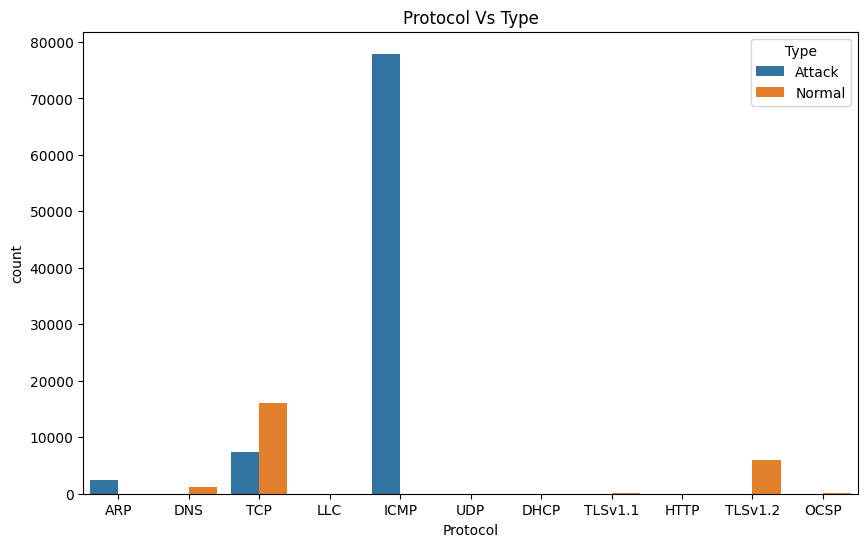

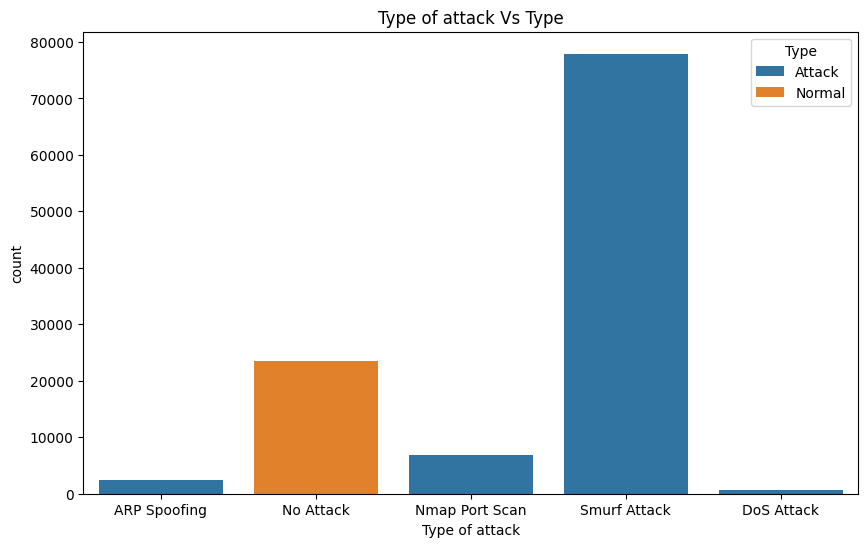

In [24]:
for column in resr_categorical_columns:
    if column != 'Type':
        plt.figure(figsize=(10,6))
        sns.countplot(x=column, hue='Type', data= data)
        plt.title(f'{column} Vs Type')
        plt.show()

ARP Spoofing, Nmap Port Scan, Smurf Attack, and DoS Attack are all types of attacks. 'No Attack' defines normal. This means that the 'Type of Attack' and 'Type' columns have the same functionality, and we will keep the 'Type' column, which is more logical.

In [25]:
df_cleaned1 = df_cleaned1.drop(['Type of attack'], axis=1)

##### Use one hot encoder on the Protocol column

In [26]:
df_cleaned1['Protocol'].unique()

array(['ARP', 'DNS', 'TCP', 'LLC', 'ICMP', 'UDP', 'DHCP', 'TLSv1.1',
       'HTTP', 'TLSv1.2', 'OCSP'], dtype=object)

In [27]:
encoded_data = pd.get_dummies(df_cleaned1, columns=['Protocol'], dtype= np.int32)

print(encoded_data.columns)

Index(['Time', 'Source', 'Destination', 'Length', 'Type', 'source_port',
       'destination_port', 'seq', 'transaction_id', 'length', 'win', 'mss',
       'ack', 'tsval', 'tsecr', 'ttl', 'who_has_ip', 'tell_ip', 'Protocol_ARP',
       'Protocol_DHCP', 'Protocol_DNS', 'Protocol_HTTP', 'Protocol_ICMP',
       'Protocol_LLC', 'Protocol_OCSP', 'Protocol_TCP', 'Protocol_TLSv1.1',
       'Protocol_TLSv1.2', 'Protocol_UDP'],
      dtype='object')


In [28]:
len(encoded_data.columns)

29

##### Use label encoder on the Type column

In [29]:
type_encoder = {'Attack': 1, 'Normal': 0}
type_encoder_inverse = {v:k for k, v in type_encoder.items()}
encoded_data['Type'] = encoded_data['Type'].map(type_encoder)

In [30]:
encoded_data['Type'].unique(), type_encoder_inverse

(array([1, 0]), {1: 'Attack', 0: 'Normal'})

In [31]:
len(encoded_data.select_dtypes(include=['number']).columns)

29

### Missing values

#### Ploting the correlation matrix

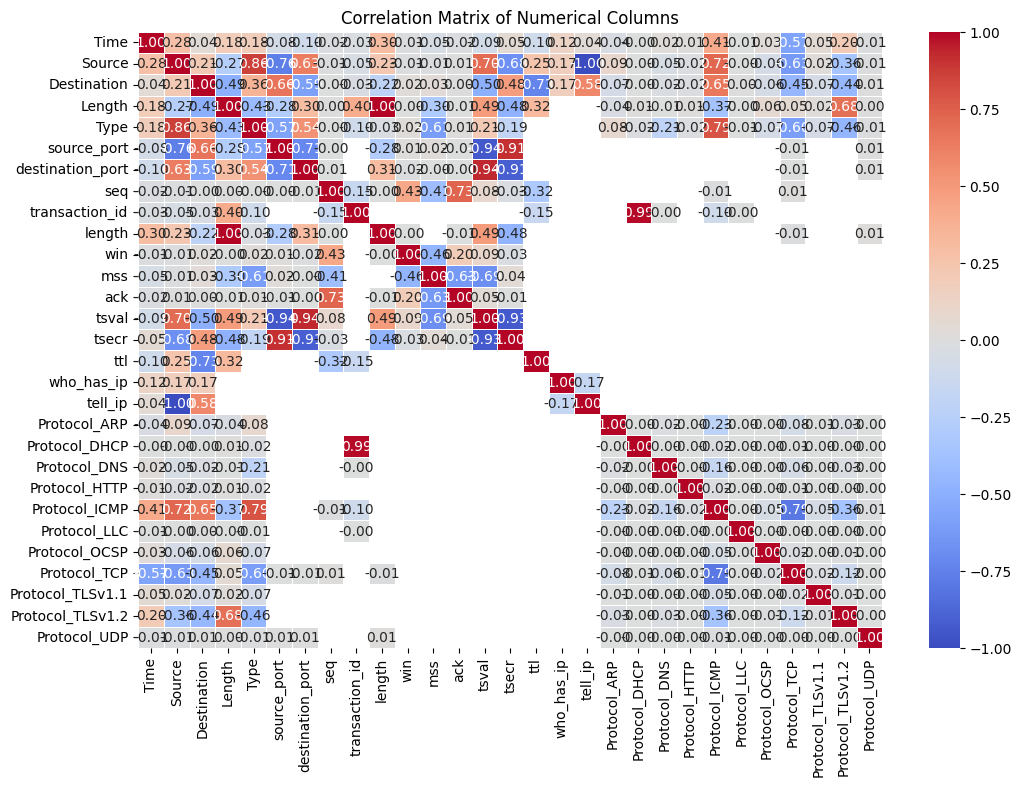

In [32]:

correlation_matrix = encoded_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [33]:
columns_to_drop = ['length', 'Protocol_UDP', 'tell_ip', 'transaction_id', 'Protocol_TLSv1.1']
encoded_df = encoded_data.drop(columns_to_drop, axis=1)

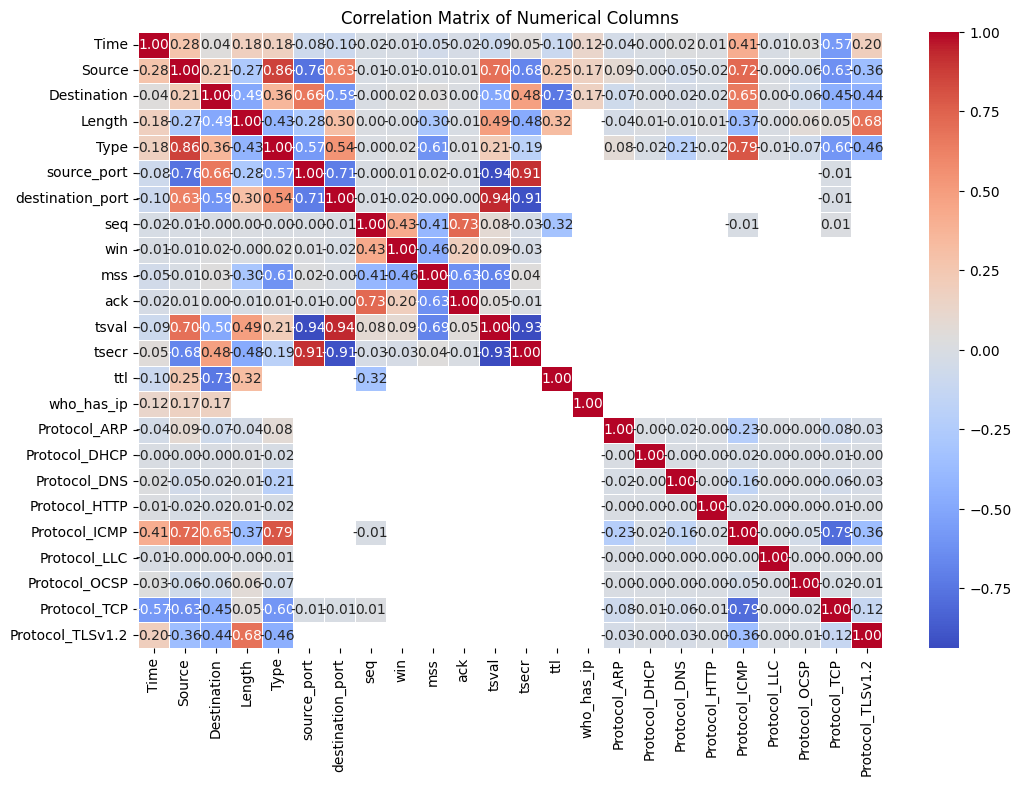

In [34]:
correlation_matrix = encoded_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

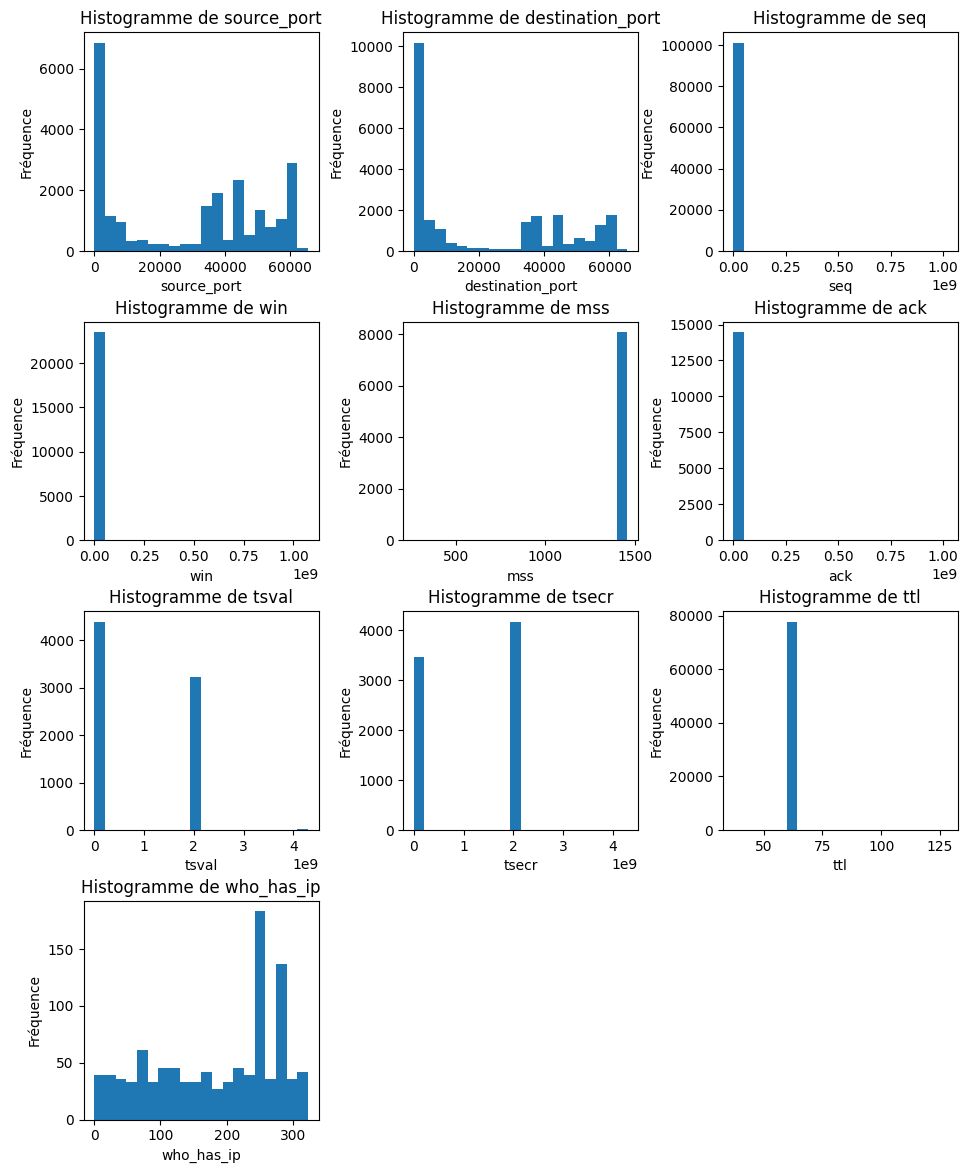

In [35]:
df = encoded_df.copy()
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols[encoded_df.isna().any()]

num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 3 * num_rows))
fig.tight_layout(pad=3.0)

for i, col in enumerate(numerical_cols):
  row = i // 3
  col_idx = i % 3
  ax = axes[row, col_idx]
  ax.hist(df[col], bins=20)
  ax.set_title(f'Histogramme de {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Fréquence')

for i in range(num_cols, num_rows * 3):
  row = i // 3
  col_idx = i % 3
  fig.delaxes(axes[row, col_idx])

plt.show()

In [36]:
numerical_cols = encoded_df.select_dtypes(include=np.number).columns
columns_has_null = numerical_cols[encoded_df.isna().any()]
columns_has_null

Index(['source_port', 'destination_port', 'seq', 'win', 'mss', 'ack', 'tsval',
       'tsecr', 'ttl', 'who_has_ip'],
      dtype='object')

In [37]:
method_columns = {
    'median':['source_port', 'destination_port', 'seq', 'win', 'mss'],  
    'mean':['ack', 'tsval', 'tsecr', 'ttl', 'who_has_ip']
}

In [38]:
for method, columns in method_columns.items():
    if method == 'median':
        for column in columns:
            encoded_df[column] = encoded_df[column].fillna(encoded_df[column].median())
    elif method == 'mean':
        for column in columns:
            encoded_df[column] = encoded_df[column].fillna(encoded_df[column].mean())

In [40]:
encoded_df.isna().sum()

Time                0
Source              0
Destination         0
Length              0
Type                0
source_port         0
destination_port    0
seq                 0
win                 0
mss                 0
ack                 0
tsval               0
tsecr               0
ttl                 0
who_has_ip          0
Protocol_ARP        0
Protocol_DHCP       0
Protocol_DNS        0
Protocol_HTTP       0
Protocol_ICMP       0
Protocol_LLC        0
Protocol_OCSP       0
Protocol_TCP        0
Protocol_TLSv1.2    0
dtype: int64

___
             Split, Balance, and Normalize the data                 
---          

In [41]:
X = encoded_df.drop(columns=['Type'])
y = encoded_df['Type']

In [42]:
# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Step 2: Balance the data using SMOTE
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

In [49]:
y_train_balanced.value_counts(), y_train.value_counts()

(Type
 0    18783
 1    18783
 Name: count, dtype: int64,
 Type
 1    70182
 0    18783
 Name: count, dtype: int64)

In [53]:
# Step 3: Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized = scaler.transform(X_test)

___
                        Train Models                    
---

In [54]:
# Random Forest Classifier with important hyperparameters
rf = RandomForestClassifier(
    n_estimators=50,           # Number of trees in the forest
    max_depth=10,              # Maximum depth of each tree
    random_state=42            # For reproducibility
)

# AdaBoost Classifier with important hyperparameters
adab = AdaBoostClassifier(
    n_estimators=50,           # Number of weak learners
    learning_rate=1.0,         # Shrinks the contribution of each weak learner
    random_state=42            # For reproducibility
)

# Gradient Boosting Classifier with important hyperparameters
gbm = GradientBoostingClassifier(
    n_estimators=50,          # Number of boosting stages
    learning_rate=0.1,         # Learning rate
    max_depth=10,               # Maximum depth of individual trees
    random_state=42            # For reproducibility
)

# XGBoost Classifier with important hyperparameters
model = XGBClassifier(
    n_estimators=50,          # Number of trees
    learning_rate=0.1,         # Step size shrinkage used to prevent overfitting
    max_depth=10,               # Maximum depth of each tree
    random_state=42            # For reproducibility
)

# Gaussian Naive Bayes with important hyperparameters
GNB = GaussianNB(
    var_smoothing=1e-9         # Portion of the largest variance added to variances for stability
)

# Decision Tree Classifier with important hyperparameters
dt = DecisionTreeClassifier(
    max_depth=50,            # Maximum depth of the tree
    random_state=42            # For reproducibility
)


estimators = [rf, adab, gbm, model, GNB, dt]
classifiers = ['RandomForestClassifier', 'AdaBoostClassifier', 
                'GradientBoostingClassifier', 'XGBoostClassifier',
                 'Gaussian Naive Bayes Classifier', 'DecisionTreeClassifier']


In [56]:
X_train, X_test, y_train = X_train_normalized, X_test_normalized, y_train_balanced
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37566, 23), (22242, 23), (37566,), (22242,))

In [57]:
# Train each model
for name, estimator in zip(classifiers, estimators):
    print("-"*50)
    print(f"Training {name}...")
    estimator.fit(X_train, y_train)
    print(f"{name} training complete.")


--------------------------------------------------
Training RandomForestClassifier...
RandomForestClassifier training complete.
--------------------------------------------------
Training AdaBoostClassifier...
AdaBoostClassifier training complete.
--------------------------------------------------
Training GradientBoostingClassifier...
GradientBoostingClassifier training complete.
--------------------------------------------------
Training XGBoostClassifier...
XGBoostClassifier training complete.
--------------------------------------------------
Training Gaussian Naive Bayes Classifier...
Gaussian Naive Bayes Classifier training complete.
--------------------------------------------------
Training DecisionTreeClassifier...
DecisionTreeClassifier training complete.


                             Model  Accuracy  Precision    Recall  F1 Score  \
0           RandomForestClassifier  0.993346   1.000000  0.991578  0.995771   
1               AdaBoostClassifier  0.991278   0.999942  0.989017  0.994450   
2       GradientBoostingClassifier  0.994650   0.999885  0.993342  0.996603   
3                XGBoostClassifier  0.993391   0.999943  0.991691  0.995800   
4  Gaussian Naive Bayes Classifier  0.978060   0.989120  0.983041  0.986071   
5           DecisionTreeClassifier  0.994785   0.999428  0.993968  0.996690   

        AUC  
0  0.999655  
1  0.999423  
2  0.999744  
3  0.999663  
4  0.990337  
5  0.995942  


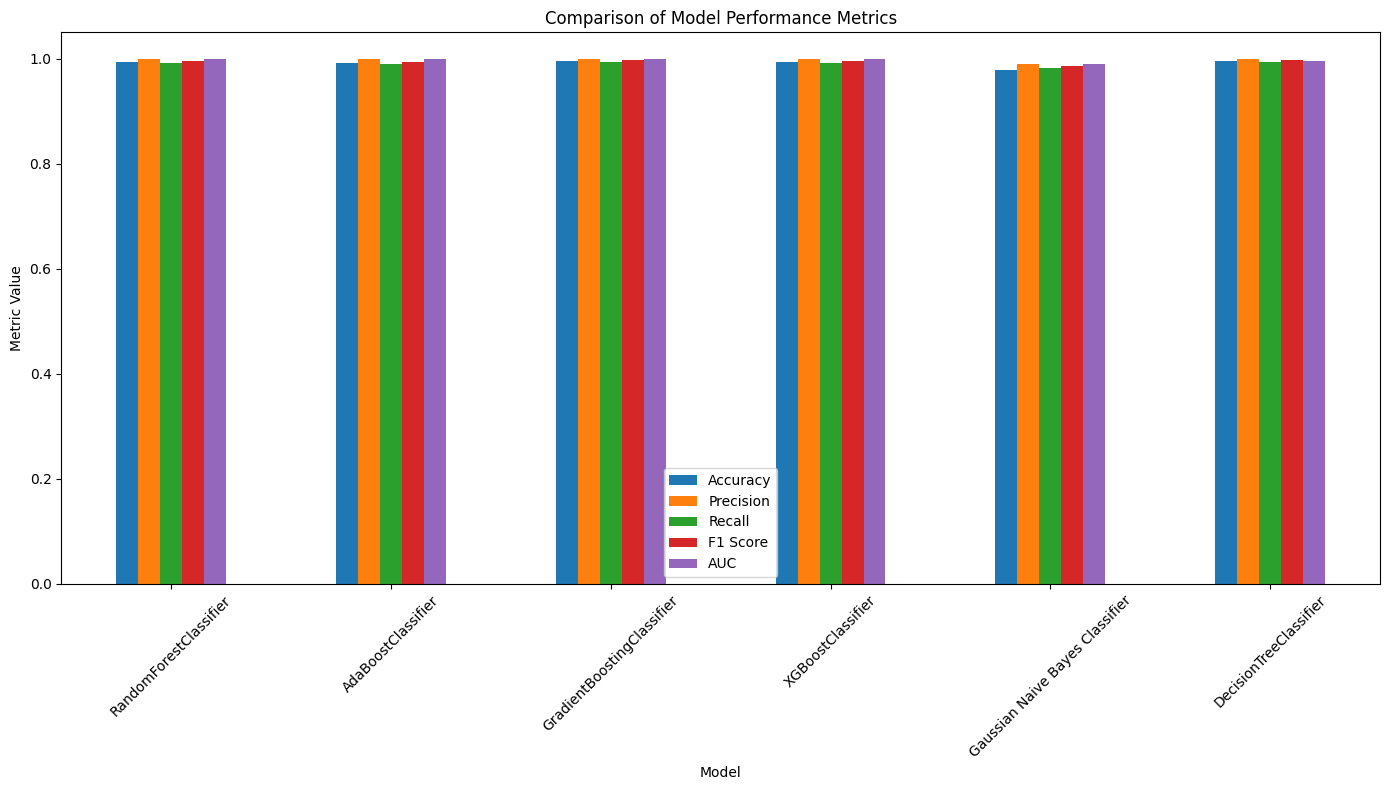

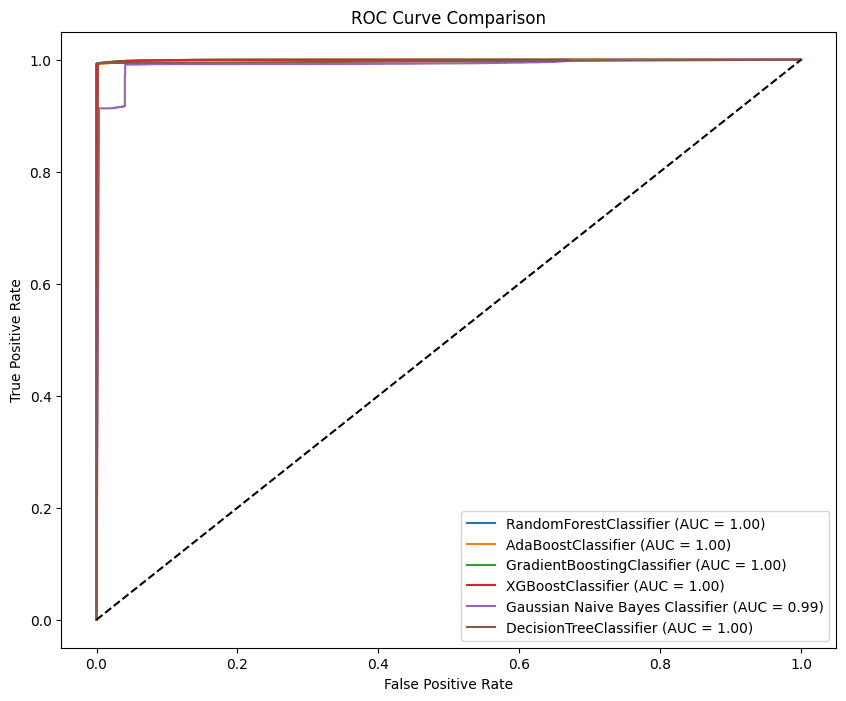

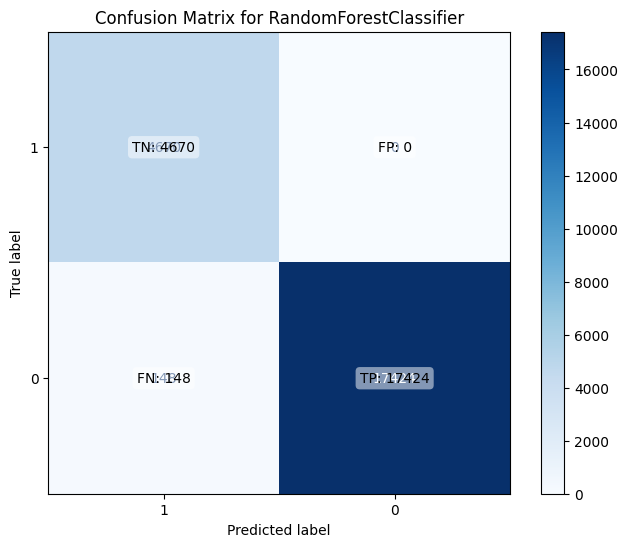

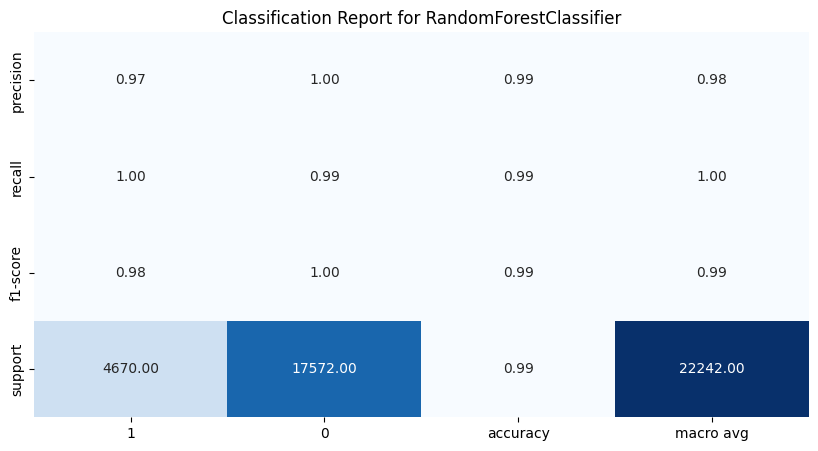

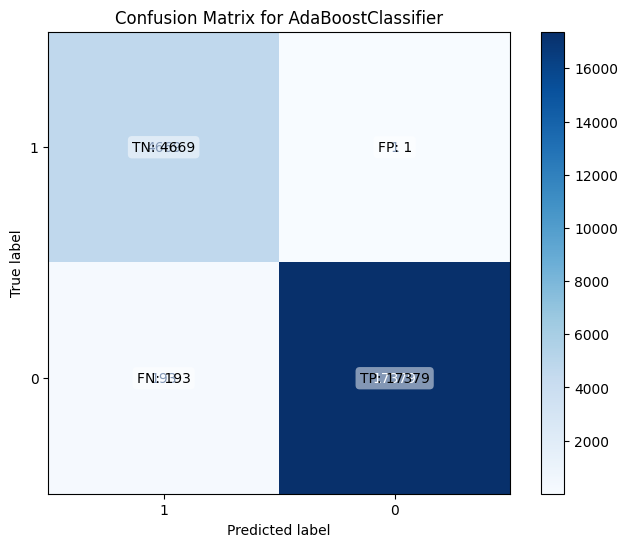

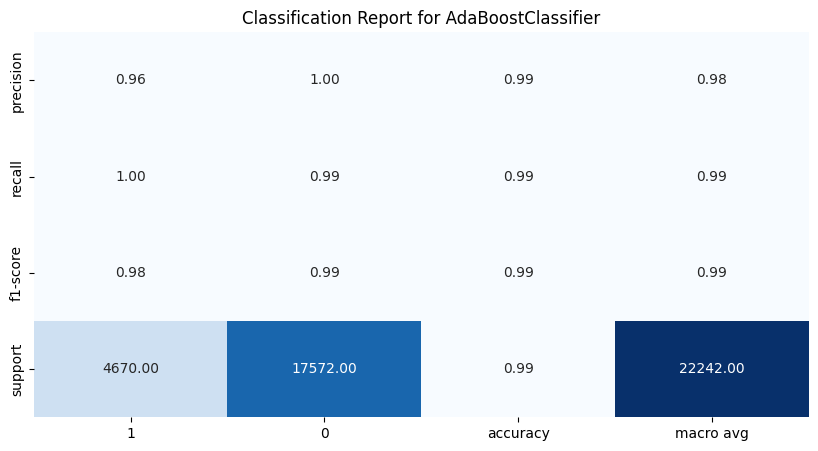

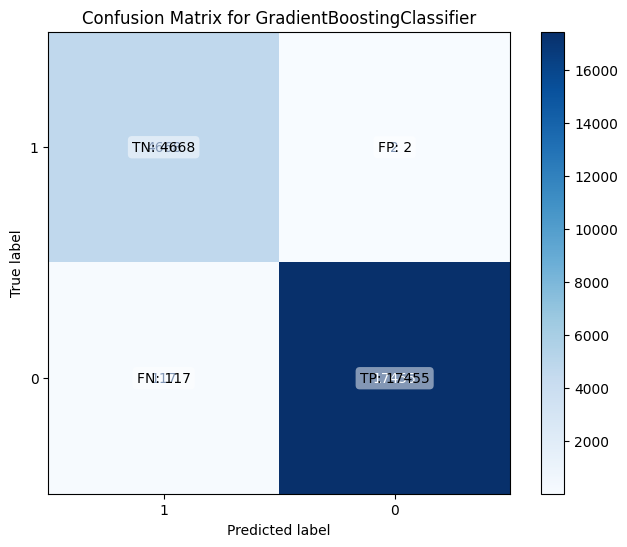

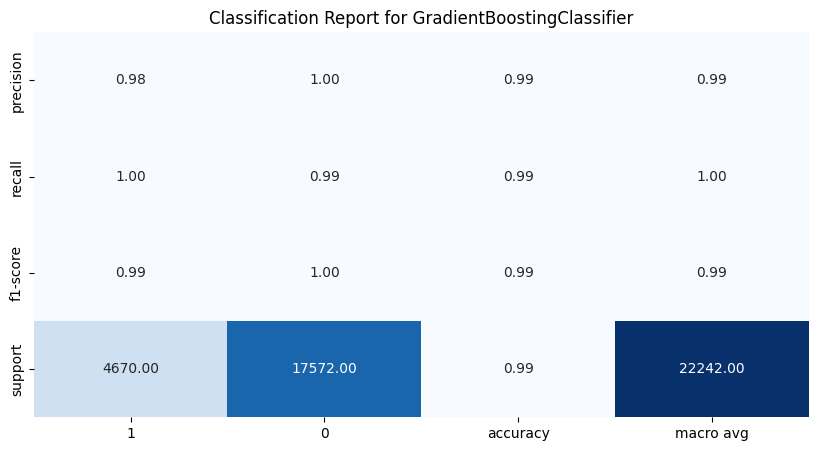

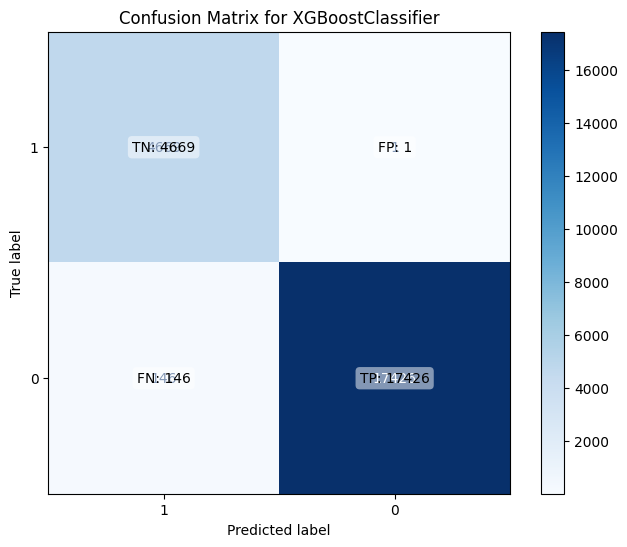

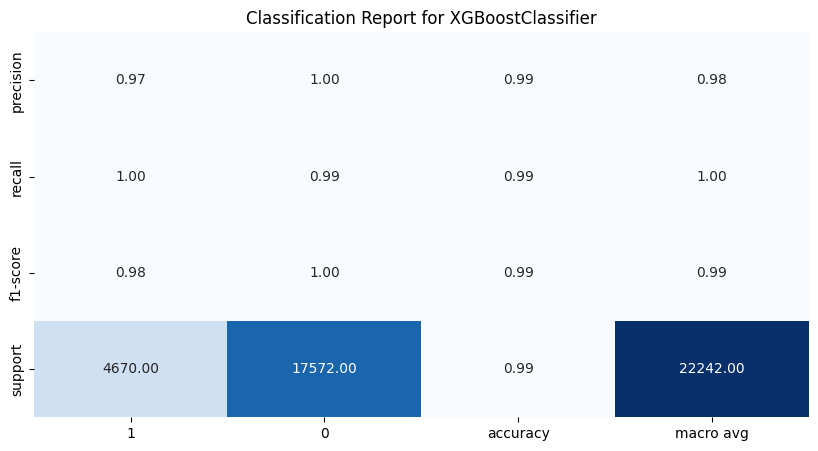

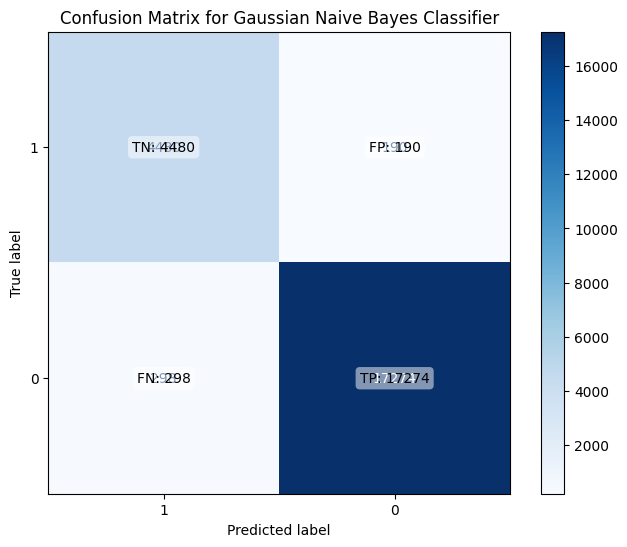

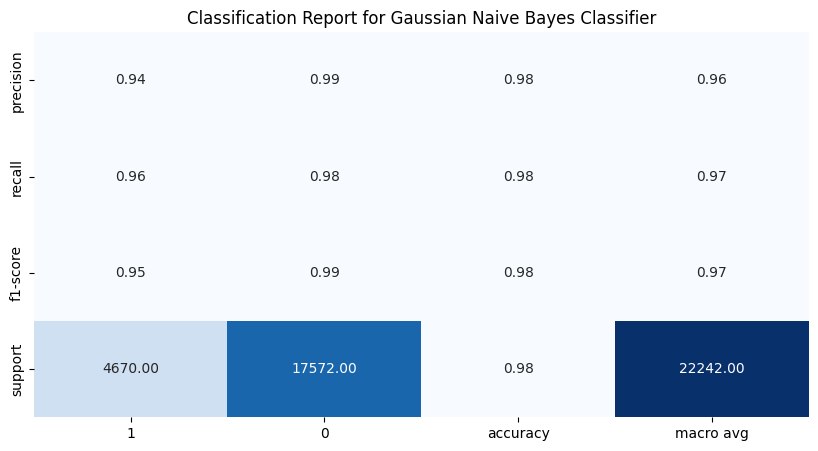

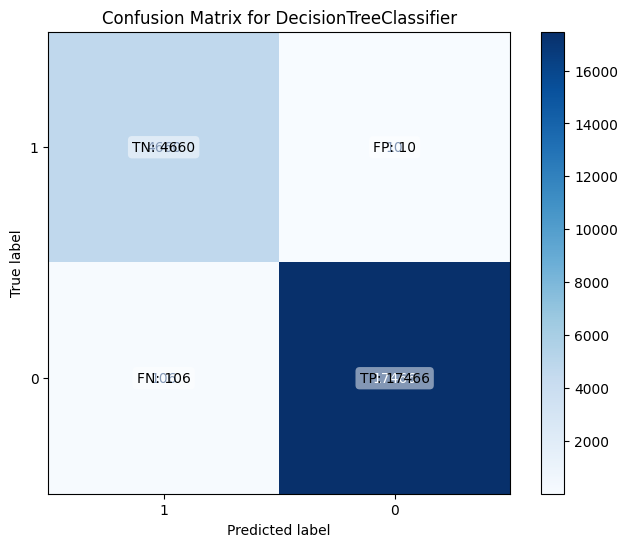

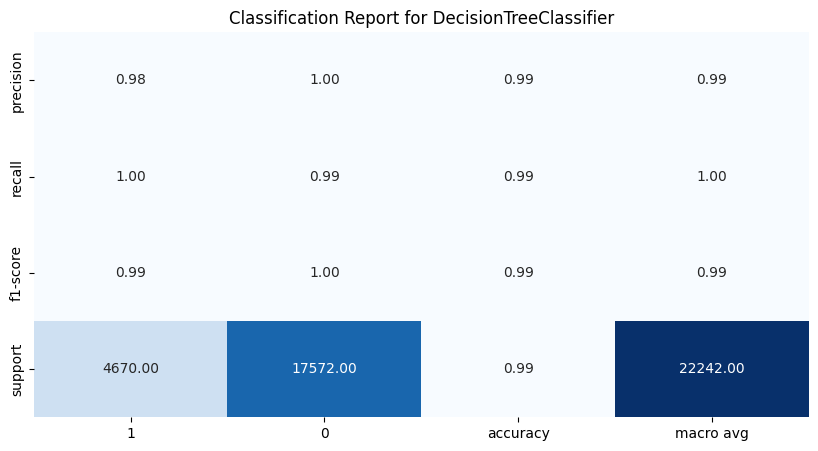

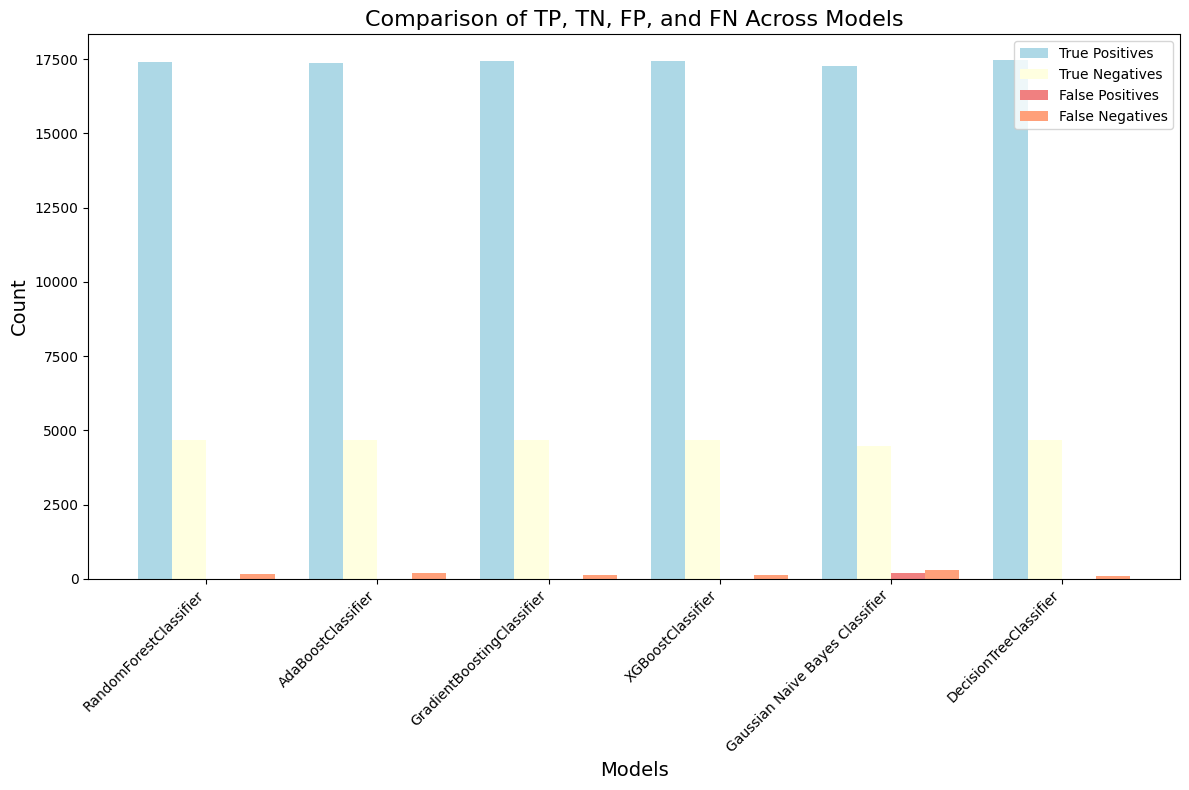

In [58]:
evaluate_models(estimators, classifiers, type_encoder_inverse, X_test, y_test)

----
                            with PCA                               
---

Explained variance ratio: 28.75%
[0.16585737 0.12163423]


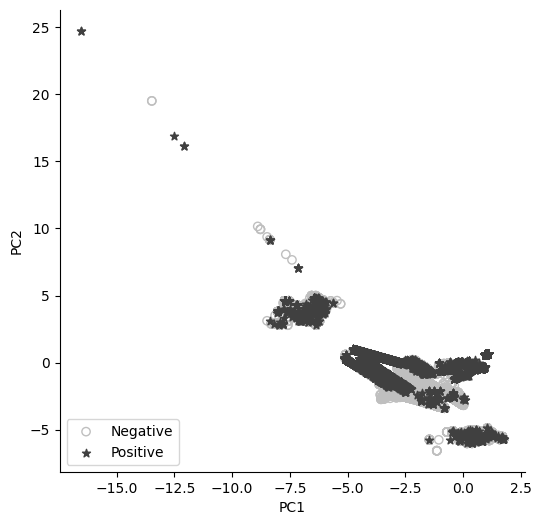

In [59]:
def plot_2d(X, y, title=''):
    from sklearn.preprocessing import StandardScaler
    X_std = StandardScaler().fit_transform(X)

    from sklearn.decomposition import PCA
    dec = PCA(n_components=2)
    X_reduced = dec.fit_transform(X_std)
    
    f, ax = plt.subplots(figsize=(6,6))
    ax.scatter(X_reduced[y==0,0], X_reduced[y==0,1], 
               facecolors='none', edgecolors='0.75', label="Negative")
    ax.scatter(X_reduced[y==1,0], X_reduced[y==1,1], c='0.25', marker='*', 
               label='Positive')
    ax.legend(loc='lower left')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    print ("Explained variance ratio: %.2f%%" % 
           (100*dec.explained_variance_ratio_.sum()))
    print (dec.explained_variance_ratio_)
    #plt.savefig('img/plot2d.jpeg',format='jpeg',bbox_inches='tight',dpi=450)
    plt.show()
    

X = encoded_df.drop(columns=['Type'])
labels = encoded_df['Type']

plot_2d(X, labels)

In [60]:
# Apply PCA with 95% explained variance
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)  # Transform the data
X_test_pca = pca.transform(X_test)

# Check the number of components selected
print(f"Number of components selected to retain 95% variance: {pca.n_components_}")


Number of components selected to retain 95% variance: 16


In [61]:
X_train_pca.shape, X_train.shape, X_test_pca.shape, X_test.shape

((37566, 16), (37566, 23), (22242, 16), (22242, 23))

In [62]:
# Random Forest Classifier with important hyperparameters
rf_pca = RandomForestClassifier(
    n_estimators=50,           # Number of trees in the forest
    max_depth=10,              # Maximum depth of each tree
    random_state=42            # For reproducibility
)

# AdaBoost Classifier with important hyperparameters
adab_pca = AdaBoostClassifier(
    n_estimators=50,           # Number of weak learners
    learning_rate=1.0,         # Shrinks the contribution of each weak learner
    random_state=42            # For reproducibility
)

# Gradient Boosting Classifier with important hyperparameters
gbm_pca = GradientBoostingClassifier(
    n_estimators=50,          # Number of boosting stages
    learning_rate=0.1,         # Learning rate
    max_depth=10,               # Maximum depth of individual trees
    random_state=42            # For reproducibility
)

# XGBoost Classifier with important hyperparameters
model_pca = XGBClassifier(
    n_estimators=50,          # Number of trees
    learning_rate=0.1,         # Step size shrinkage used to prevent overfitting
    max_depth=10,               # Maximum depth of each tree
    random_state=42            # For reproducibility
)

# Gaussian Naive Bayes with important hyperparameters
GNB_pca = GaussianNB(
    var_smoothing=1e-9         # Portion of the largest variance added to variances for stability
)

# Decision Tree Classifier with important hyperparameters
dt_pca = DecisionTreeClassifier(
    max_depth=50,            # Maximum depth of the tree
    random_state=42            # For reproducibility
)


estimators_pca = [rf_pca, adab_pca, gbm_pca, model_pca, GNB_pca, dt_pca]
classifiers_pca = ['RandomForestClassifier_pca', 'AdaBoostClassifier_pca', 
                'GradientBoostingClassifier_pca', 'XGBoostClassifier_pca',
                 'Gaussian Naive Bayes Classifier_pca', 'DecisionTreeClassifier_pca']


In [63]:
# Train each model
for name, estimator in zip(classifiers_pca, estimators_pca):
    print("-"*50)
    print(f"Training {name}...")
    estimator.fit(X_train_pca, y_train)
    print(f"{name} training complete.")

--------------------------------------------------
Training RandomForestClassifier_pca...
RandomForestClassifier_pca training complete.
--------------------------------------------------
Training AdaBoostClassifier_pca...
AdaBoostClassifier_pca training complete.
--------------------------------------------------
Training GradientBoostingClassifier_pca...
GradientBoostingClassifier_pca training complete.
--------------------------------------------------
Training XGBoostClassifier_pca...
XGBoostClassifier_pca training complete.
--------------------------------------------------
Training Gaussian Naive Bayes Classifier_pca...
Gaussian Naive Bayes Classifier_pca training complete.
--------------------------------------------------
Training DecisionTreeClassifier_pca...
DecisionTreeClassifier_pca training complete.


                                 Model  Accuracy  Precision    Recall  \
0           RandomForestClassifier_pca  0.990468   0.999885  0.988049   
1               AdaBoostClassifier_pca  0.988355   0.999654  0.985602   
2       GradientBoostingClassifier_pca  0.990558   0.999540  0.988504   
3                XGBoostClassifier_pca  0.990873   0.999770  0.988675   
4  Gaussian Naive Bayes Classifier_pca  0.924872   0.987551  0.916458   
5           DecisionTreeClassifier_pca  0.990558   0.998164  0.989870   

   F1 Score       AUC  
0  0.993932  0.999053  
1  0.992578  0.999135  
2  0.993991  0.999252  
3  0.994192  0.999228  
4  0.950677  0.978121  
5  0.994000  0.991507  


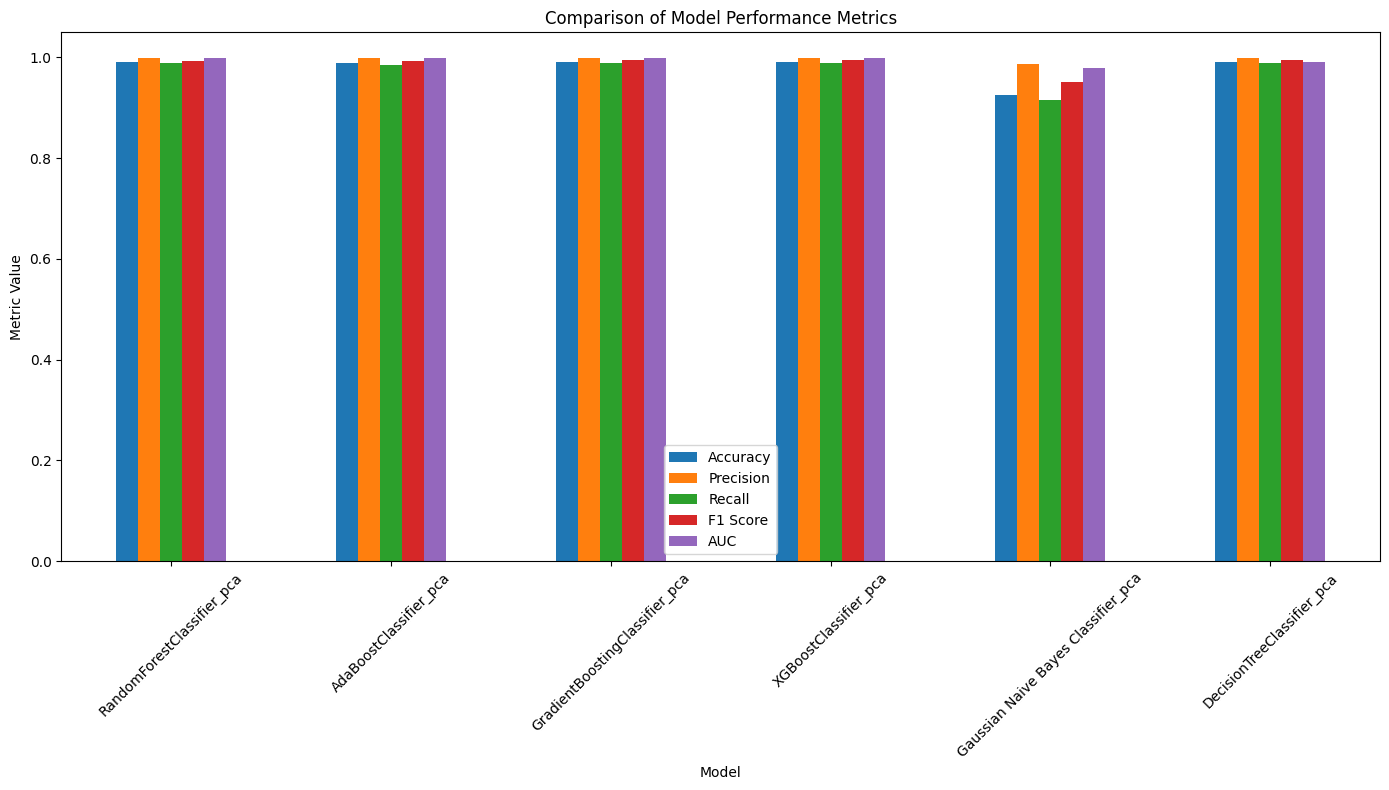

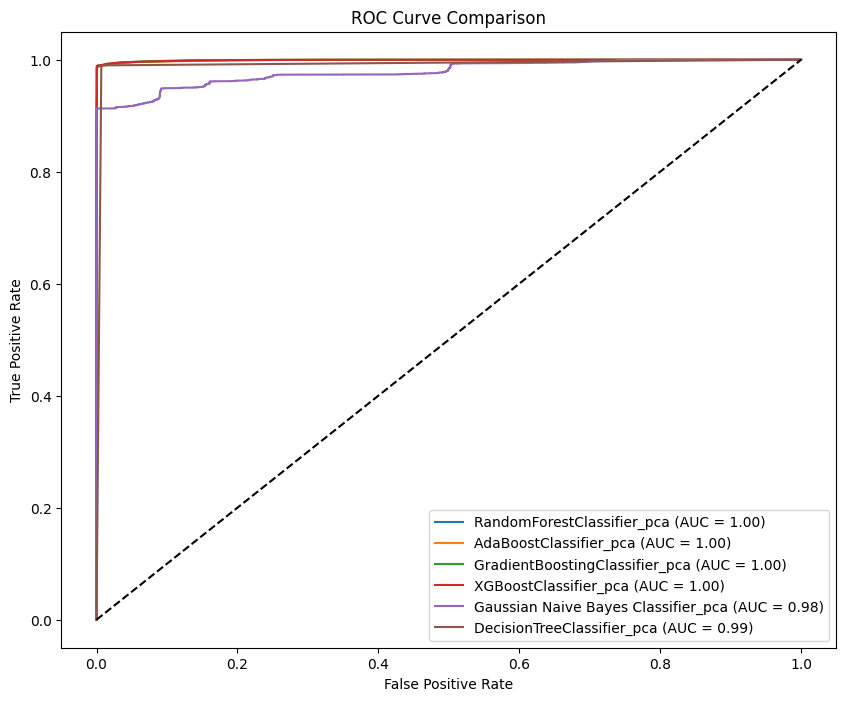

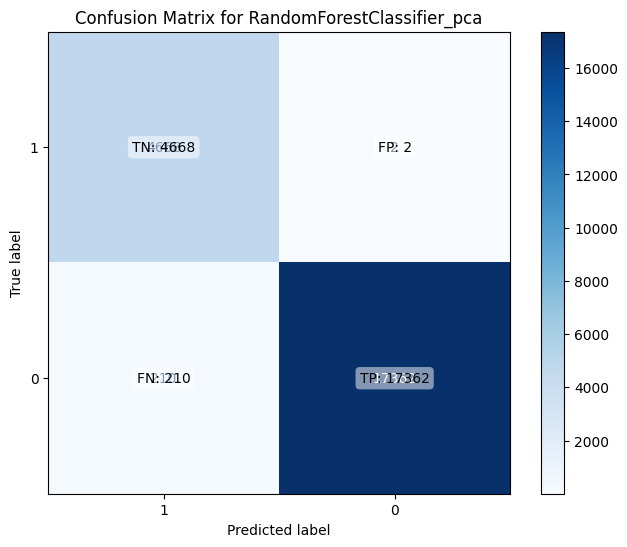

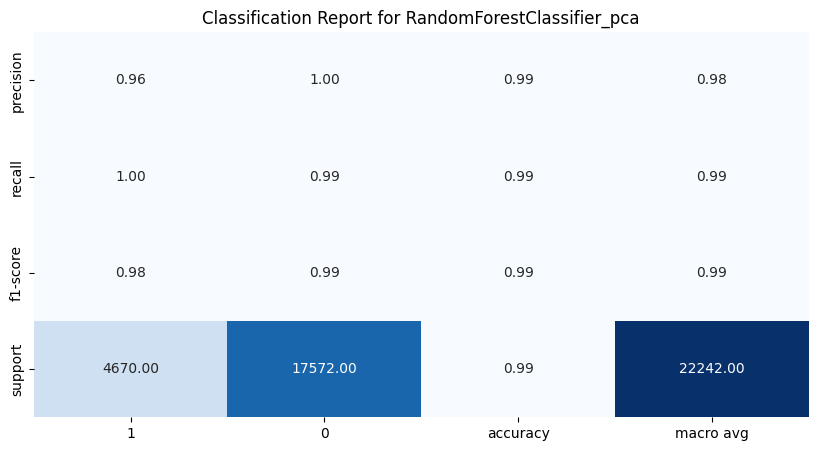

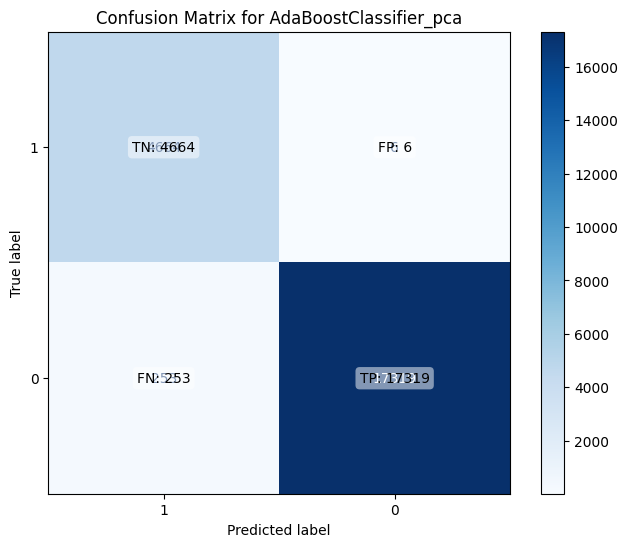

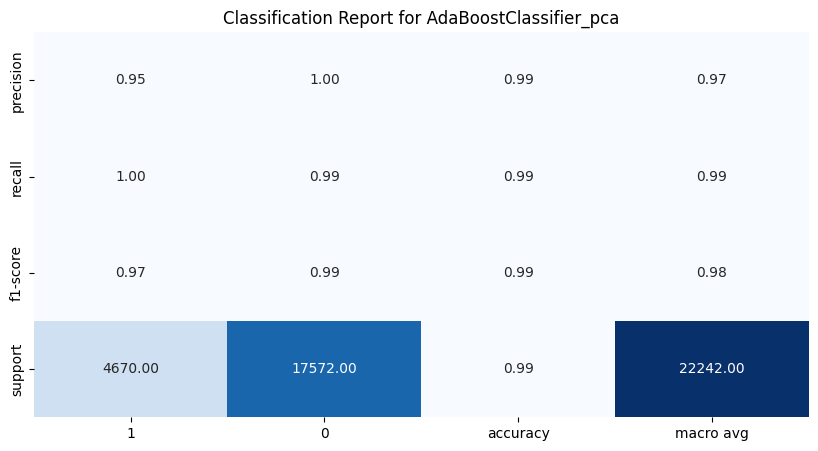

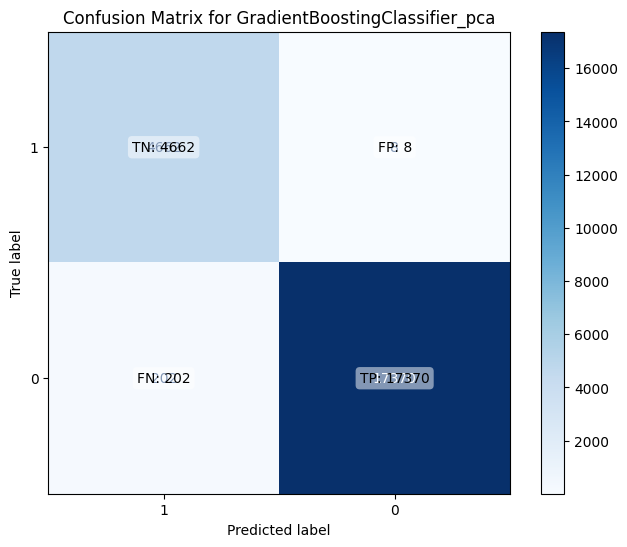

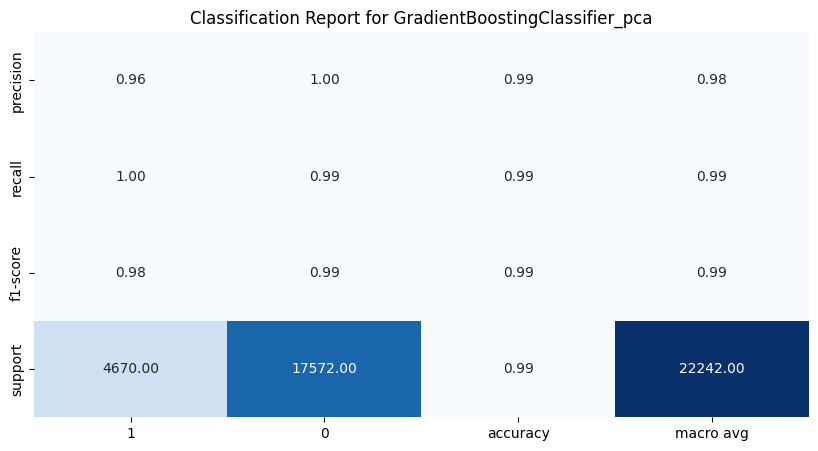

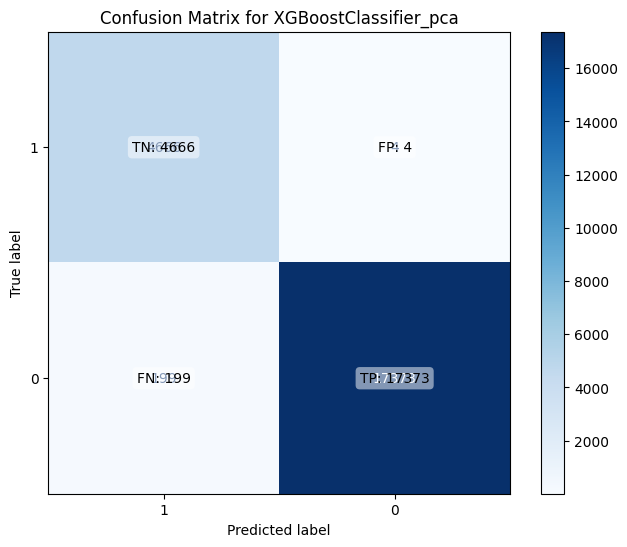

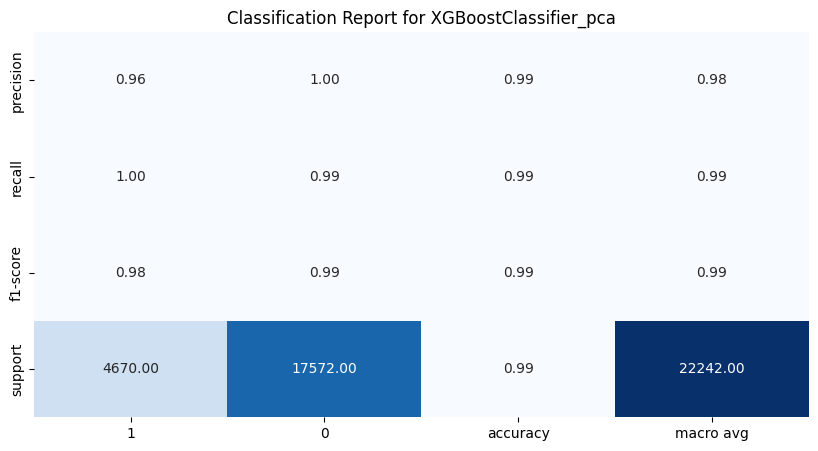

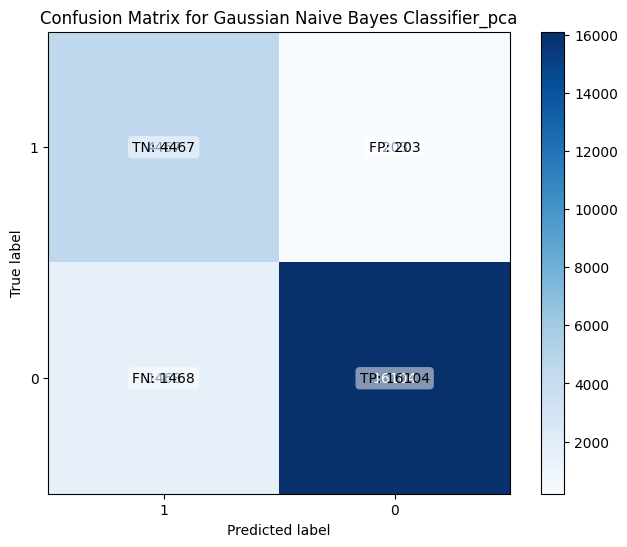

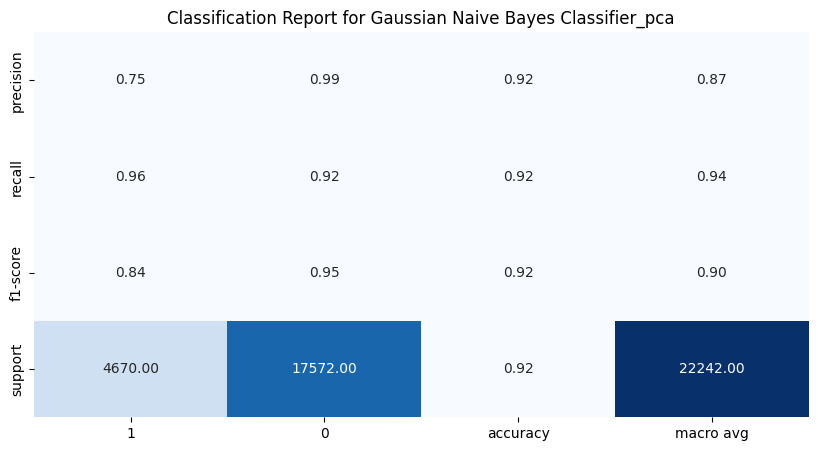

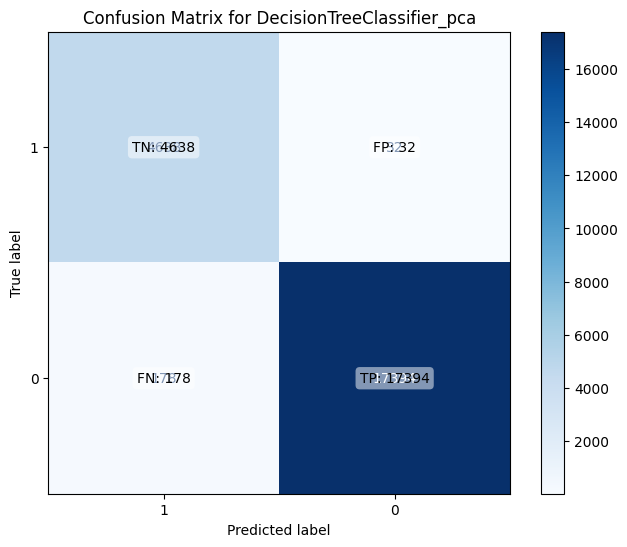

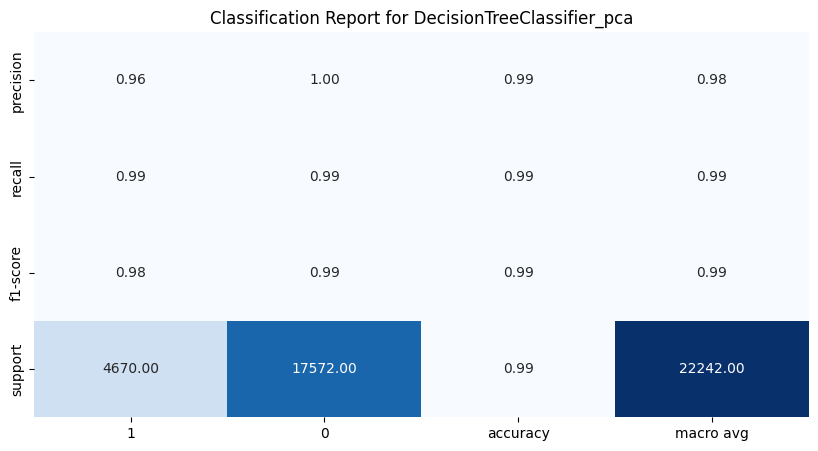

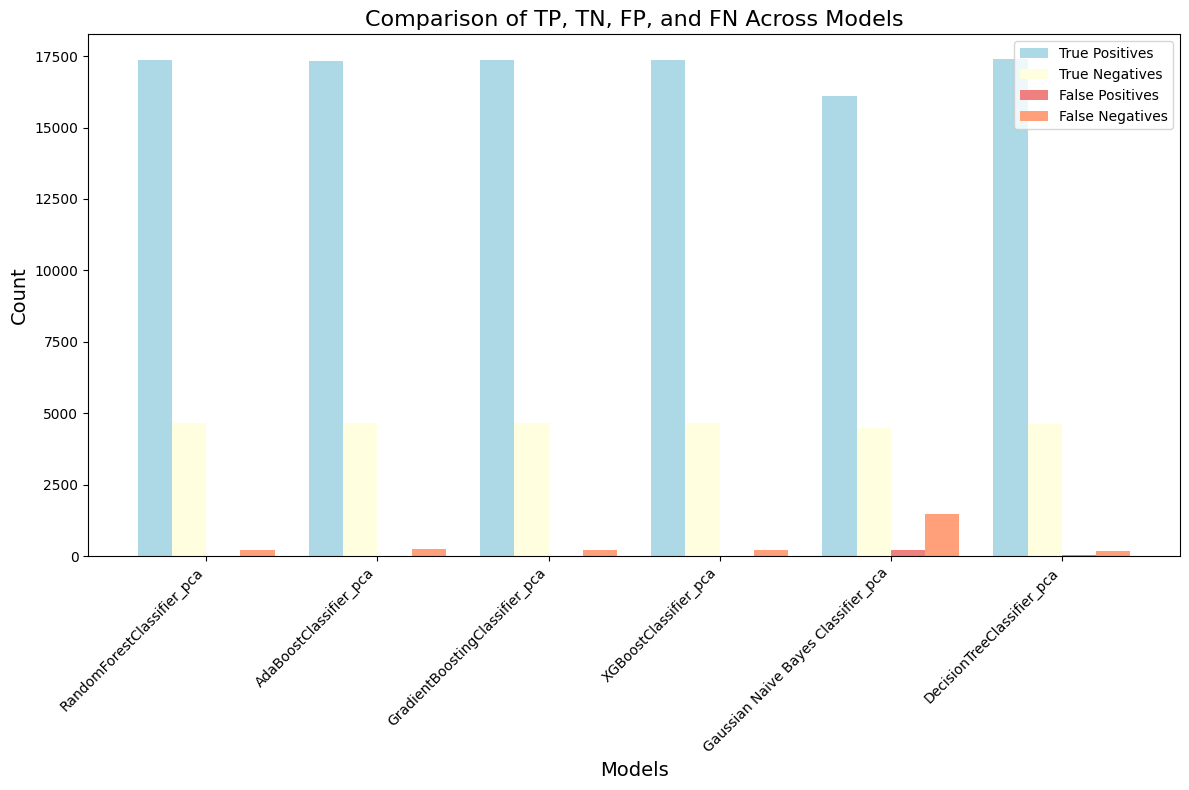

In [64]:
evaluate_models(estimators_pca, classifiers_pca, type_encoder_inverse, X_test_pca, y_test)

---
            Comparison of estimators with and without PCA                  
---

In [65]:
all_estimators = estimators_pca + estimators
all_classifiers = classifiers_pca + classifiers

In [66]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
metrics_list = []

# Loop over models to calculate and store metrics
for i, estimator in enumerate(all_estimators):
    # Make predictions on the test set
    try:
        y_pred = estimator.predict(X_test)
        y_pred_prob = estimator.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve
    except:
        y_pred = estimator.predict(X_test_pca)
        y_pred_prob = estimator.predict_proba(X_test_pca)[:, 1] 
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Extract TN, FP, FN, TP
    tn, fp, fn, tp = cm.ravel()
    
    # Compute metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    # Compute ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Append metrics to the list
    metrics_list.append({
        'Model': all_classifiers[i],
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'AUC': roc_auc
    })

# Convert the list of metrics to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

In [67]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,RandomForestClassifier_pca,0.990468,0.999885,0.988049,0.993932,0.999053
1,AdaBoostClassifier_pca,0.988355,0.999654,0.985602,0.992578,0.999135
2,GradientBoostingClassifier_pca,0.990558,0.999540,0.988504,0.993991,0.999252
3,XGBoostClassifier_pca,0.990873,0.999770,0.988675,0.994192,0.999228
4,Gaussian Naive Bayes Classifier_pca,0.924872,0.987551,0.916458,0.950677,0.978121
5,DecisionTreeClassifier_pca,0.990558,0.998164,0.989870,0.994000,0.991507
6,RandomForestClassifier,0.993346,1.000000,0.991578,0.995771,0.999655
7,AdaBoostClassifier,0.991278,0.999942,0.989017,0.994450,0.999423
8,GradientBoostingClassifier,0.994650,0.999885,0.993342,0.996603,0.999744
9,XGBoostClassifier,0.993391,0.999943,0.991691,0.995800,0.999663


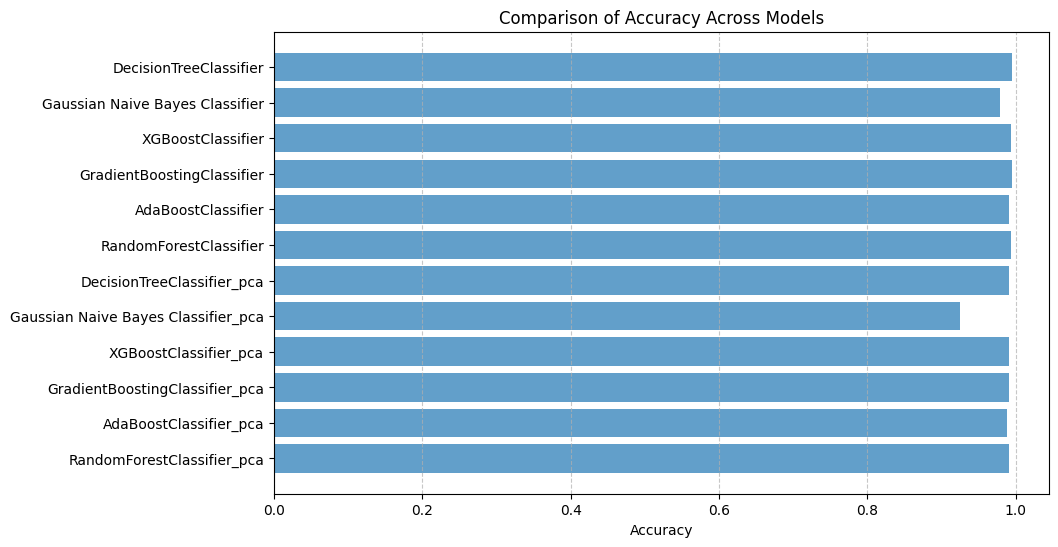

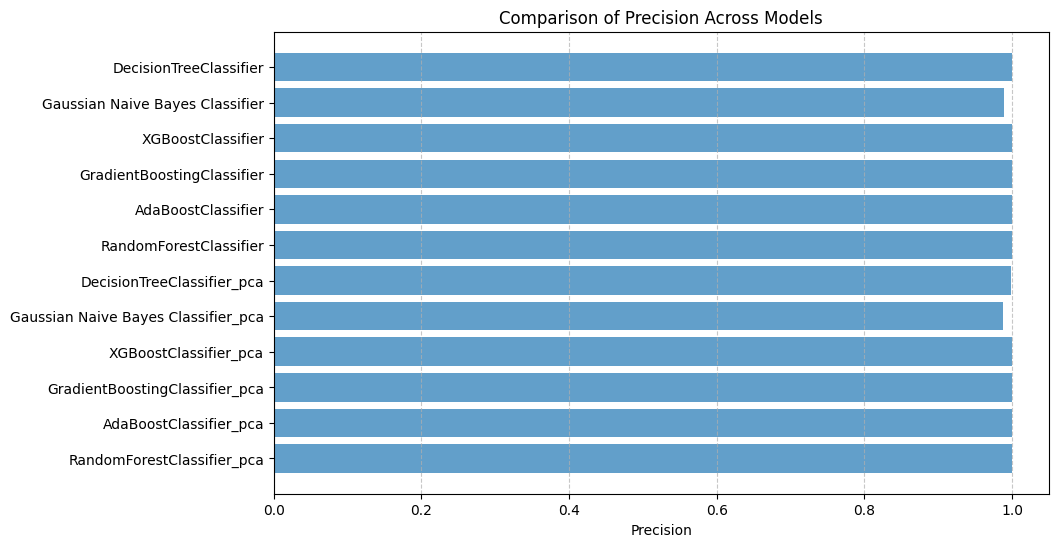

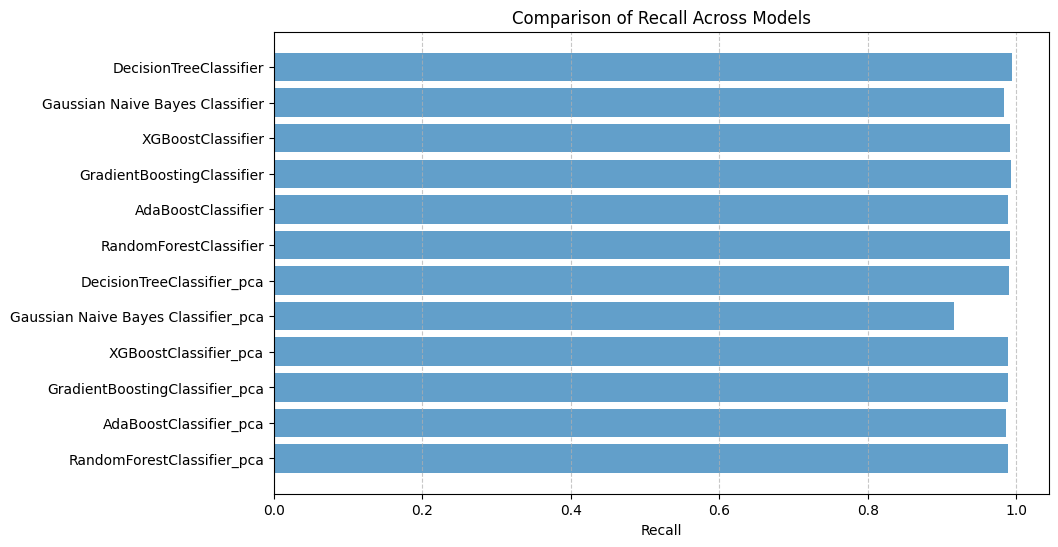

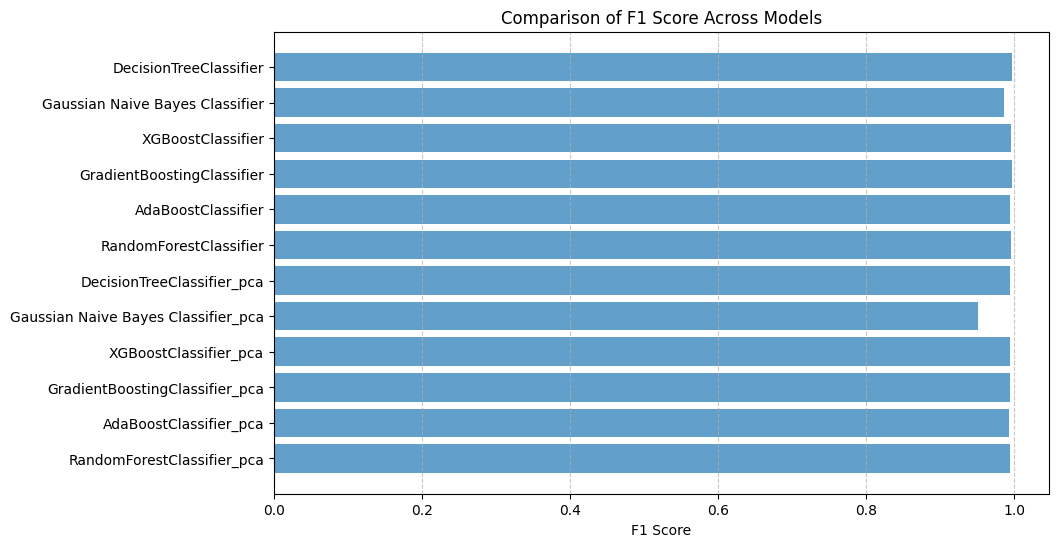

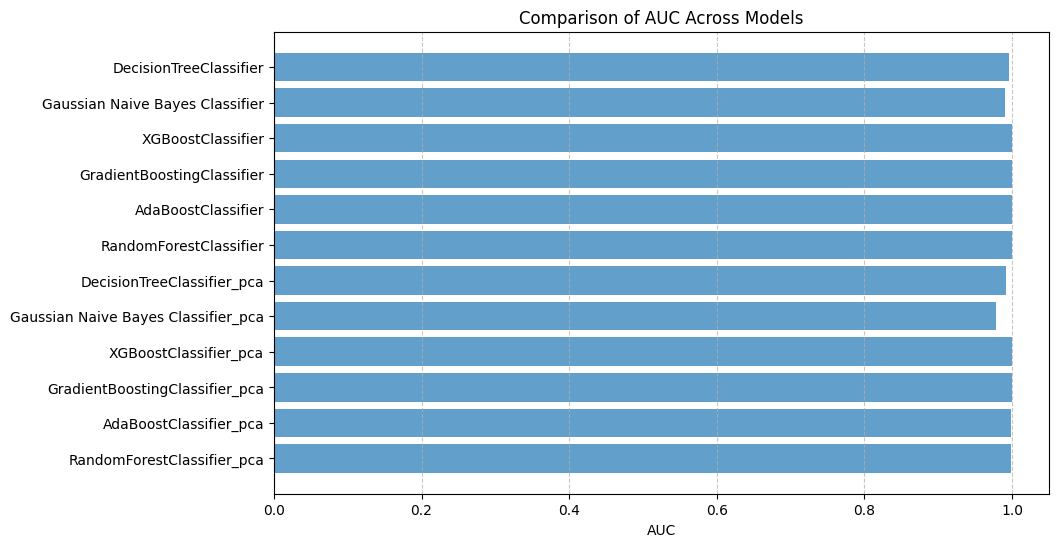

In [68]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.barh(metrics_df['Model'], metrics_df[metric], alpha=0.7)
    plt.xlabel(metric)
    plt.title(f'Comparison of {metric} Across Models')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

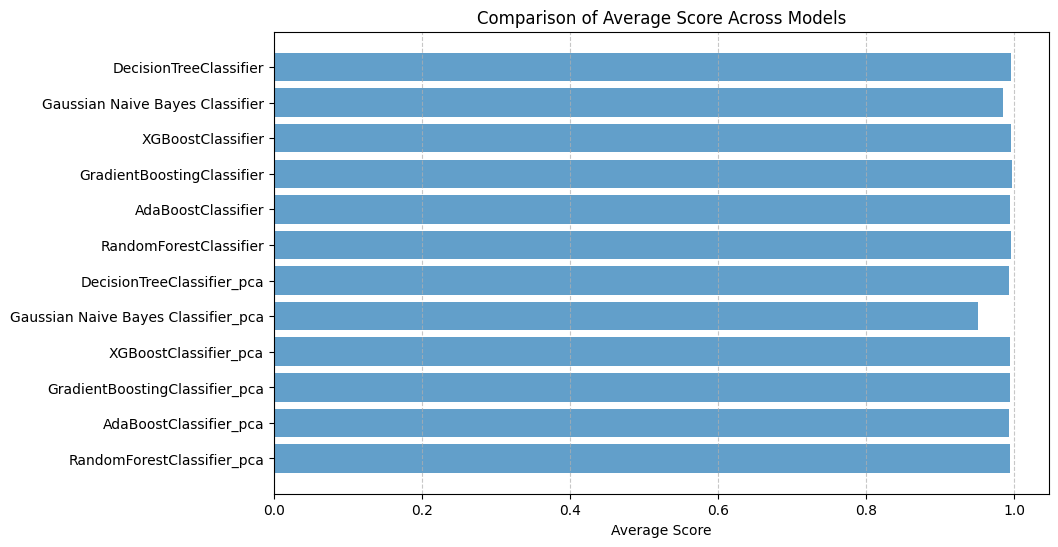

In [69]:
# Calculate the average score for each classifier across all metrics
metrics_df['Average Score'] = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']].mean(axis=1)
metrics = ['Average Score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.barh(metrics_df['Model'], metrics_df[metric], alpha=0.7)
    plt.xlabel(metric)
    plt.title(f'Comparison of {metric} Across Models')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

In [70]:
# Find the classifier with the highest average score
best_classifier = metrics_df.loc[metrics_df['Average Score'].idxmax()]

best_classifier

Model            GradientBoostingClassifier
Accuracy                            0.99465
Precision                          0.999885
Recall                             0.993342
F1 Score                           0.996603
AUC                                0.999744
Average Score                      0.996845
Name: 8, dtype: object

In [71]:
best_model = all_estimators[metrics_df['Average Score'].idxmax()]
best_model

GradientBoostingClassifier(max_depth=10, n_estimators=50, random_state=42)

In [72]:
import pickle
with open('best_classifier_for_tcp_protocol.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print('Best classifier saved as best_classifier_for_tcp_protocol.pkl')

Best classifier saved as best_classifier_for_tcp_protocol.pkl
